## Simple linear regression

Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data

SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]

In [4]:
data.describe()

SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000

## Create your first regression

Define the dependent and the independenr variables  
$y=切片+傾きx_1$  
$\hat{y}=b_0+b_1x_1$  
$\hat{y}=b_0*1+b_1x_1$

In [5]:
y = data['GPA']
x1 = data['SAT']

Explore the data

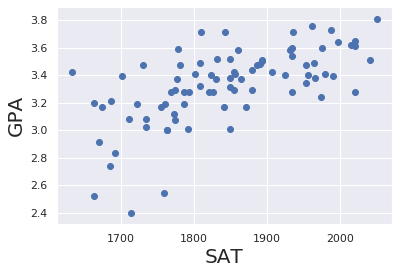

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [7]:
x = sm.add_constant(x1) # statsモデルに変数を追加
results = sm.OLS(y,x).fit() #最小二乗回帰式
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           7.20e-11
Time:                        18:20:05   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

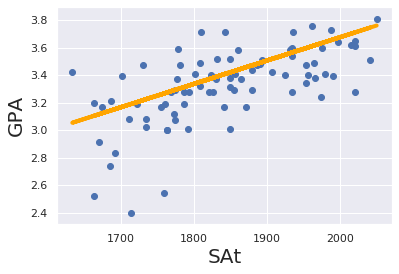

In [8]:
plt.scatter(x1,y)
yhat = 0.275 + 0.0017*x1 # y=切片+傾きx1
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAt', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### 帰無仮説による仮説検定

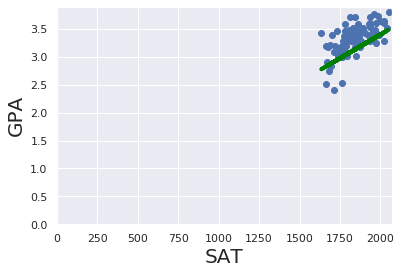

In [12]:
plt.scatter(x1,y)
yhat = 0 + 0.0017*x1 # y=切片+傾きx1 切片がゼロなので原点を通る
fig = plt.plot(x1,yhat, lw=4, c='green', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.xlim(0)
plt.ylim(0)
plt.show()

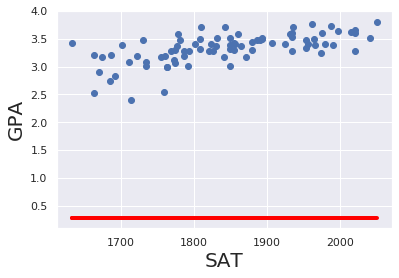

In [15]:
plt.scatter(x1,y)
yhat = 0.275 + 0*x1 # y=切片+傾きx1
fig = plt.plot(x1,yhat, lw=4, c='red', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

p値が＜0.05であれば、その変数は有意という事ができる


帰無仮説；回帰係数 = ０
対立仮説：回帰係数 ≠ ０


回帰係数（傾き）のp値が0.05を下回った場合、有意さがある

つまり、その回帰係数が０である帰無仮説を棄却する


回帰係数(傾き)が０の場合、その変数（x）は応答変数（y）に影響をあたえない因子である

逆に、回帰係数が０でない場合には、その変数は応答変数に影響を与える因子である


よって、回帰係数（傾き）のp値＝0.000であるので、「有意である」ので帰無仮説は棄却され、その回帰係数は０ではないと言える。

また、回帰係数（切片）のp値＝0.503なので「有意ではない」ということになり、帰無仮説は棄却できないので回帰係数は０ではないとは言えないとなる
